# **Load the Dataset**

In [53]:
df = pd.read_parquet("/content/train.parquet")

**Take only target drug Patient for Drop-Off**

In [54]:
trg_df = df[df['Incident']=='TARGET DRUG']

**Preprocess the Data Column to get a month from it**

In [ ]:
# convert the datetime
trg_df["Date"] = pd.to_datetime(trg_df["Date"])



**Calculate the day difference between dates**

In [ ]:
#sort the values
trg_df.sort_values(by=["Patient-Uid", "Date"], inplace=True)
trg_df["No.of.Days for Treatment"] = trg_df.groupby("Patient-Uid")["Date"].diff().dt.days

**Group the data by month and Get the month from DATE column**

In [ ]:
trg_df["Month"] = trg_df["Date"].dt.to_period("M")

**Calculate the drop off rate**

In [57]:
Droprate_permonth = trg_df.groupby("Month")["No.of.Days for Treatment"].apply(lambda x: (x < 365).sum())

In [76]:
pd.DataFrame(Droprate_permonth)

,No.of.Days for Treatment
Month,
2017-02,1
2017-03,2
2017-04,1
2017-05,3
2017-06,7
2017-07,10
2017-08,9
2017-09,24
2017-10,9


**To visualize over the Droprate_permonth in line graph**

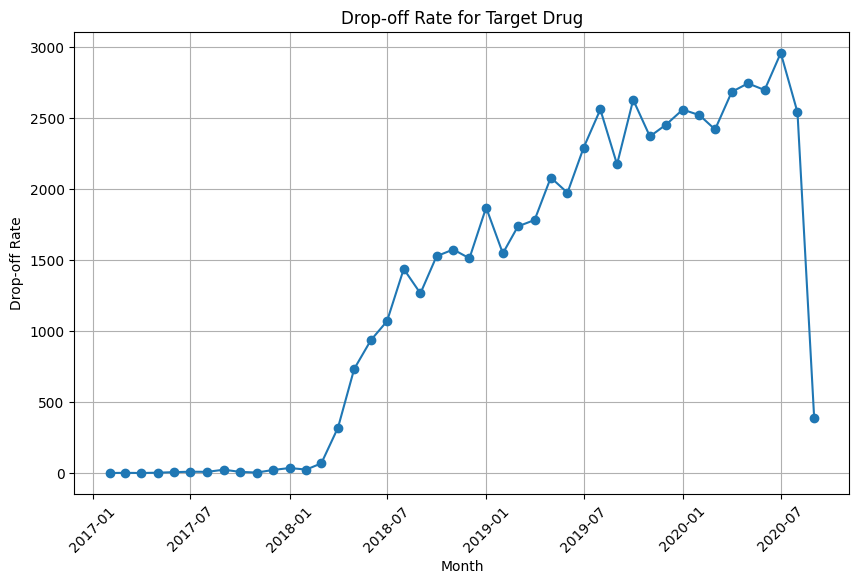

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(Droprate_permonth.index.to_timestamp(), Droprate_permonth.values, marker='o')
plt.xlabel("Month")
plt.ylabel("Drop-off Rate")
plt.title("Drop-off Rate for Target Drug")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**INFERENCE :**

**The Dropoff - rate is gradually increased over the time and a sudden fall after the month of July 2020.**

**The highest peak in dropoff-rate in July 2020 around 3000 per month**

**BAR GRAPH**

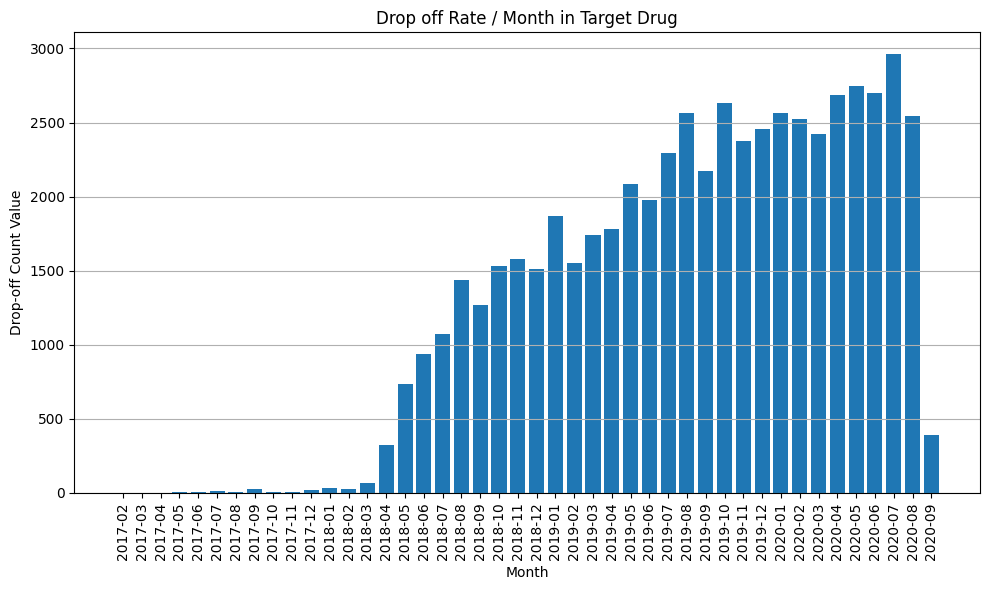

In [72]:
import pandas as pd
import matplotlib.pyplot as plt


df_dropoff = Droprate_permonth.reset_index()
df_dropoff.columns = ['Month', 'Drop-off Count']

# Sort the DataFrame by month
dropoff_df = df_dropoff.sort_values(by='Month')

plt.figure(figsize=(10, 6))
plt.bar(range(len(df_dropoff)), df_dropoff['Drop-off Count'])
plt.xlabel('Month')
plt.ylabel('Drop-off Count Value')
plt.title('Drop off Rate / Month in Target Drug')
plt.xticks(range(len(df_dropoff)), df_dropoff['Month'],rotation =90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
